# Performance measurements of Ensemble learning algorithms

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import library packages
import pandas as p
import numpy as n

In [3]:
datap = p.read_csv("heart.csv")
df=datap.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [6]:
X = df.drop(labels='target', axis=1)
#Response variable
y = df.loc[:,'target']    

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

Bagging Method:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
lr = LogisticRegression()
num_trees = 100
model = BaggingClassifier(base_estimator=lr, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X_test, y_test, cv=3)
blr=results.max()*100
print("")
print('Accuracy score for Ensemble method of Bagged Logistic Regresion is:',blr)
print("")


Accuracy score for Ensemble method of Bagged Logistic Regresion is: 89.65517241379311



Boosting Method:

In [9]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
model = AdaBoostClassifier(base_estimator=lr, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X_test, y_test, cv=3)
bolr=results.max()*100
print("")
print('Accuracy score for Ensemble method of Boosting Logistic Regresion is:',bolr)
print("")


Accuracy score for Ensemble method of Boosting Logistic Regresion is: 96.55172413793103



Voting Classifier:

In [10]:
#Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('LogisticRegression', model1))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_test, y_test, cv=3)
print("")
print("Accuracy score for Ensemble method of voting classifier of Logistic Regresion algorithm is:",results.max()*100)


Accuracy score for Ensemble method of voting classifier of Logistic Regresion algorithm is: 96.55172413793103


Parameter Calculations:

In [11]:
ensemble.fit(X_train,y_train)
predictR = ensemble.predict(X_test)
print("")
print('Classification report of voting classifier Results:')
print("")

print(classification_report(y_test,predictR))

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of voting classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


Classification report of voting classifier Results:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

Confusion Matrix result of voting classifier is:
 [[33  8]
 [ 7 43]]

Sensitivity :  0.8048780487804879

Specificity :  0.86

True Positive : 43
True Negative : 33
False Positive : 8
False Negative : 7

True Positive Rate : 0.86
True Negative Rate : 0.8048780487804879
False Positive Rate : 0.1951219512195122
False Negative Rate : 0.14

Positive Predictive Value : 0.8431372549019608
Negative predictive value : 0.825


In [12]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm1, title='Confusion matrix-VC', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix-VC:
[[33  8]
 [ 7 43]]


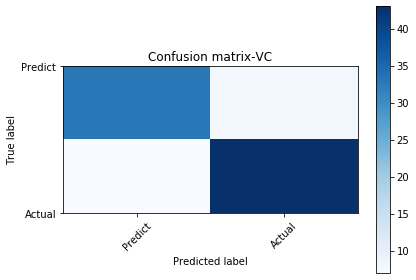

In [13]:
cm1=confusion_matrix(y_test, predictR)
print('Confusion matrix-VC:')
print(cm1)
plot_confusion_matrix(cm1)

In [14]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, predictR):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictR)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic-VC')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.19512195 1.        ]
True Positive rate:  [0.   0.86 1.  ]


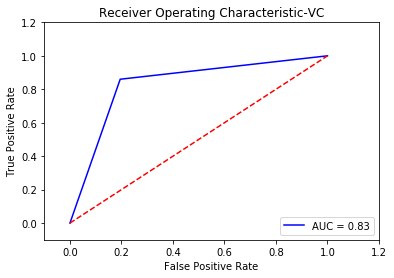

In [15]:
plot_roc_curve(y_test, predictR)